In [1]:
#LOAD LIBRARIES 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline  
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [2]:
#LOAD DATASET
leuanalysis = pd.read_csv('leuanalysisNew1.csv')
leuanalysis.head()

,CELL,SMEAR,INFIL,LI,BLAST,TEMP,REMISS
0,0.8,0.83,0.66,1.9,1.10,1.00,1
1,0.9,0.36,0.32,1.4,0.74,0.99,1
2,0.8,0.88,0.70,0.8,0.18,0.98,0
3,1.0,0.87,0.87,0.7,1.05,0.99,0
4,0.9,0.75,0.68,1.3,0.52,0.98,1


In [3]:
#CREATE X (WE IGNORE THE Y VARIABLE)
x = leuanalysis.drop('REMISS', axis=1).to_numpy()

#SCALE THE DATA
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
data_transformed=sc.fit_transform(x)

C:\Users\elomb\anaconda3\envs\DATA1200\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


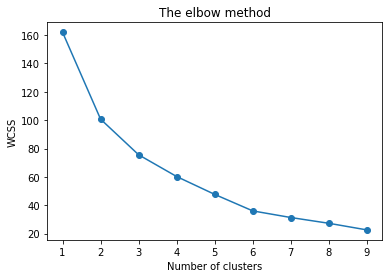

In [4]:
#DETERMINE OPTIMUM NUMBER OF CLUSTERS 
wcss = []
for i in range(1, 10):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10,random_state = 100)
    kmeans.fit(data_transformed)
    wcss.append(kmeans.inertia_)
    
#PLOT ELBOW METHOD
plt.plot(range(1, 10), wcss,marker='o')
plt.title('The elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS') #within cluster sum of squares
plt.show()

For n_clusters= 2, The Silhouette Coefficient is 0.22972085065748718
For n_clusters= 3, The Silhouette Coefficient is 0.18310534303313306
For n_clusters= 4, The Silhouette Coefficient is 0.20631955740350025
For n_clusters= 5, The Silhouette Coefficient is 0.28185069808024893
For n_clusters= 6, The Silhouette Coefficient is 0.23580631229453766
For n_clusters= 7, The Silhouette Coefficient is 0.26707532254416966
For n_clusters= 8, The Silhouette Coefficient is 0.21708486525696882
For n_clusters= 9, The Silhouette Coefficient is 0.20720625848456434


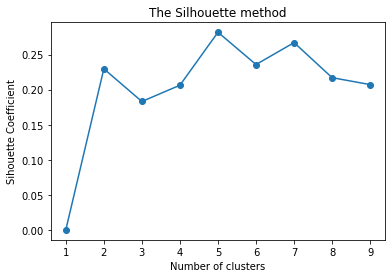

In [5]:
#CREATE SILHOUETTE COEFFICIENTS
scores= [0]
for n_cluster in range(2, 10):
       kmeans = KMeans(n_clusters=n_cluster).fit(x)
       label = kmeans.labels_
       sil_coeff = silhouette_score(data_transformed, label, metric='euclidean')
       scores.append(sil_coeff) 
       print('For n_clusters= {}, The Silhouette Coefficient is {}'.format(n_cluster, sil_coeff))

#PLOT SILHOUETTE
plt.plot(range(1,10), scores, marker='o')
plt.title('The Silhouette method')
plt.xlabel('Number of clusters')
plt.ylabel('Sihouette Coefficient') 
plt.show()

In [6]:
#CREATE KMEANS WITH 2 CLUSTERS 

#APPLY KMEANS CLUSTERING
kmeans = KMeans(n_clusters = 2, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 100)
y_kmeans = kmeans.fit_predict(data_transformed)

#ADD PREDICTION COLUMN TO DATASET
leuanalysis2= leuanalysis.drop('REMISS', axis=1)
leuanalysis2['New Cluster']=kmeans.labels_
leuanalysis2['New Cluster'] = leuanalysis2['New Cluster'].map({0:'Cluster 1', 1:'Cluster 2'}) 
leuanalysis2.head()

,CELL,SMEAR,INFIL,LI,BLAST,TEMP,New Cluster
0,0.8,0.83,0.66,1.9,1.10,1.00,Cluster 2
1,0.9,0.36,0.32,1.4,0.74,0.99,Cluster 1
2,0.8,0.88,0.70,0.8,0.18,0.98,Cluster 2
3,1.0,0.87,0.87,0.7,1.05,0.99,Cluster 2
4,0.9,0.75,0.68,1.3,0.52,0.98,Cluster 2


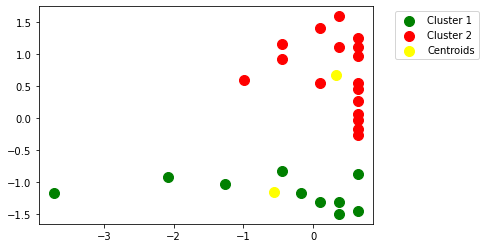

In [7]:
#PLOT FOR 2 CLUSTERS
plt.scatter(data_transformed[y_kmeans == 0, 0], data_transformed[y_kmeans == 0, 1], s = 100, c = 'green', label = 'Cluster 1')
plt.scatter(data_transformed[y_kmeans == 1, 0], data_transformed[y_kmeans == 1, 1], s = 100, c = 'red', label = 'Cluster 2')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], s = 100, c = 'yellow', label = 'Centroids')

#LEGEND
plt.legend(bbox_to_anchor=(1.05, 1), loc=2)